In [21]:
# Useful starting lines
%matplotlib inline
import datetime
from costs import compute_loss
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [117]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
# standardize the data
tX_std = standardize(tX)



In [116]:
print(tX_std)

[[ 0.3323017   0.47014479  0.00198435 ... -0.63936657 -0.63936694
  -0.37608954]
 [ 0.41073016 -1.02905672 -0.15001691 ...  1.57024962  1.56691941
   1.22308666]
 [ 0.43715599  0.57329995  0.36885945 ... -0.63936657 -0.63936694
  -0.74543941]
 ...
 [ 0.4001554  -0.9083318  -0.34647229 ...  1.56322908  1.56300003
   1.35059715]
 [ 0.46716253  0.48977992 -0.03933471 ...  1.57253686  1.56505567
   0.72456329]
 [ 0.65544596 -0.3530877   1.72560419 ... -0.63936657 -0.63936694
  -0.08031989]]


# least squares GD

In [118]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    return (-1/len(y))*tx.T@(y-tx@w)
    # ***************************************************


def least_squares_GD(y, tx, initial_w, max_iters, gamma):
    """least square gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # compute gradient computes the gradient
        gradient = compute_gradient(y,tx,w)
        # compute loss. here MSE is used
        loss = compute_loss(y,tx,w)
        # ***************************************************
        # TODO: update w by gradient
        w = w-gamma*gradient
        # ***************************************************
        # store w and loss
        ws.append(w)
        losses.append(loss)

    return np.array(losses), np.array(ws)

## test gd

Gradient Descent: execution time=1.532 seconds


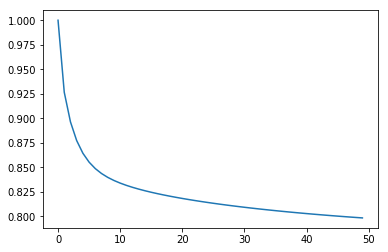

In [119]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
# Initialization
w_initial = np.zeros(30)

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = least_squares_GD(y, tX_std, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))
plt.plot(gradient_losses)

# least square SGD

In [6]:

def compute_stoch_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    e = y-tx@w
    return -1/len(y)*tx.T@e
    # ***************************************************


def least_squares_SGD(y, tx, initial_w, batch_size, max_iters, gamma):
    """Least square stochastic gradient descent algorithm."""
    # ***************************************************
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute random batch
        a = batch_iter(y, tx, batch_size, num_batches=1, shuffle=True)
        a = list(a)
        tx2, y2 = a[0][1], a[0][0]
        
        # compute gradient & loss
        grad = compute_stoch_gradient(y2,tx2,w)
        loss= compute_loss(y2, tx2, w)
        print(grad)
        # update gradient
        w = w-gamma*grad
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        #print("stoch Gradient Descent({bi}/{ti}): loss={l}".format(
              #bi=n_iter, ti=max_iters - 1, l=loss))

    return np.array(losses), np.array(ws)

## test sgd

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[-0.22956179  0.33703679  0.0128398  -0.18711549 -0.13552264 -0.18266247
 -0.13449967 -0.00885513  0.01169675 -0.14893575  0.18676573 -0.25801643
 -0.13524255 -0.2249742   0.00261552 -0.00275639  0.02803091  0.00311532
 -0.00386454 -0.02448859 -0.01398646 -0.13040342 -0.12767184 -0.14878897
 -0.14166152 -0.14163481 -0.13487747 -0.13516953 -0.13514774 -0.13068457]
[-2.10611255e-01  3.12086803e-01  8.53035749e-03 -1.42420375e-01
 -9.45841587e-02 -1.43915479e-01 -9.35348989e-02 -3.33625226e-02
  2.94836069e-02 -1.06166427e-01  1.78896996e-01 -2.24881947e-01
 -9.42992569e-02 -2.03021107e-01  2.35334867e-03  4.21052170e-03
  3.53822534e-02  5.10803049e-05  1.66817318e-03  3.75829891e-05
 -1.71041327e-03 -8.86480783e-02 -8.19950087e-02 -1.09130396e-01
 -1.03814695e-01 -1.03843561e-01 -9.35014614e-02 -9.42300363e-02
 -9.42215570e-02 -8.68706830e-02]
[-0.19140369  0.28940688  0.00868243 -0.12219172 -0.

[-6.49356246e-02  1.27427619e-01  1.87712919e-02 -3.40754902e-02
  9.37253536e-03 -3.58039126e-02  1.02629511e-02 -4.85667461e-02
  2.49148498e-02  2.87498586e-03  7.69873482e-02 -8.13986898e-02
  9.62358632e-03 -8.64521139e-02  2.12187727e-03 -4.21575706e-05
  2.01007927e-03  6.19223529e-03 -1.61521719e-03 -4.65409046e-03
  3.52944797e-03  1.54192198e-02  3.05840466e-02  1.22653371e-03
  1.90718595e-03  1.89832664e-03  1.05916324e-02  9.69753970e-03
  9.69491598e-03  2.27093710e-02]
[-0.06600394  0.12521683  0.01719337 -0.02978975  0.00157069 -0.04347543
  0.00246406 -0.05011815  0.03965076  0.00200959  0.05818398 -0.07933312
  0.00181639 -0.07779233  0.00403315  0.00676097 -0.01023232  0.00879653
  0.00113376  0.00401243 -0.00449103  0.01623615  0.0277958   0.00374792
  0.00448847  0.00447536  0.00307454  0.00187493  0.0018699   0.02246361]
[-0.06044898  0.12313728  0.01532522 -0.02880727  0.00940177 -0.03541173
  0.01027327 -0.05282136  0.03917351  0.00186359  0.05664    -0.07253014

[-0.02027383  0.06396361  0.02225607 -0.01857785  0.00084702 -0.0396414
  0.00167157 -0.03368458  0.02389418  0.00293644  0.01972995 -0.03741081
  0.00106762 -0.044111   -0.00760055  0.00364444 -0.03248288 -0.00623859
  0.00096699 -0.01626899  0.00118401  0.01694399  0.02521157  0.00669719
  0.00705854  0.00705703  0.00204596  0.00111367  0.00114404  0.0208652 ]
[-2.43963414e-02  6.63815336e-02  1.68720395e-02 -2.00002727e-02
 -1.19298084e-03 -4.22113839e-02 -3.74526830e-04 -3.87079554e-02
  2.70975066e-02 -2.79847493e-03  1.68848656e-02 -3.97168216e-02
 -9.64928083e-04 -4.85232624e-02 -2.00181581e-03 -4.77378437e-05
 -3.67757682e-02 -4.89562499e-03 -2.85922860e-03 -1.40571479e-02
 -2.43170670e-03  1.18241285e-02  2.42923874e-02  6.70520594e-03
  7.46035095e-03  7.45518476e-03 -2.52797529e-04 -9.01927929e-04
 -8.99895717e-04  1.60704926e-02]
[-2.07327477e-02  6.58015960e-02  2.58561520e-02 -1.56641589e-02
  7.28226808e-04 -3.94845313e-02  1.52468425e-03 -3.31784729e-02
  1.98162908e-02

[-0.00345136  0.04222392  0.02582323 -0.00496211  0.00422617 -0.03267048
  0.00496939 -0.03334536  0.01332963  0.00546658  0.01418772 -0.02669153
  0.00442947 -0.0310547  -0.00099752  0.00039204 -0.02641291 -0.00051376
 -0.0026652  -0.01659032  0.00854316  0.01796598  0.02115264  0.00266896
  0.00211196  0.00209364  0.005018    0.00447873  0.00449958  0.01950008]
[-3.91767401e-03  4.26356268e-02  1.74718476e-02 -7.15925347e-03
  5.58331544e-03 -3.26229069e-02  6.35344891e-03 -3.62064576e-02
  1.24890718e-02  4.67288505e-03  1.19624103e-02 -2.36990938e-02
  5.79576779e-03 -3.03103430e-02  5.06506215e-03  7.32178918e-03
 -3.11967374e-02  3.77354117e-03 -8.20346829e-06 -1.30934928e-02
  1.52601625e-03  1.71787677e-02  2.24317474e-02  6.94256231e-03
  6.81968229e-03  6.80278651e-03  6.54064242e-03  5.86272314e-03
  5.84846979e-03  1.94698803e-02]
[-0.00443765  0.03930361  0.02543974 -0.01163509 -0.00664531 -0.04443721
 -0.00588791 -0.02989474  0.00783988 -0.00230385  0.00867791 -0.03074183

[ 0.00252349  0.03032516  0.02123356 -0.0131376   0.00275431 -0.03171268
  0.00343605 -0.02907554 -0.01177354 -0.00219353  0.00413514 -0.01662317
  0.00293778 -0.03043994  0.00128348 -0.00040599 -0.03822145  0.00101839
  0.00353987 -0.02936152 -0.00267152  0.0123285   0.01731913  0.00182061
  0.0018879   0.00189248  0.00341107  0.00299315  0.00298234  0.01297515]
[ 0.00367771  0.0268898   0.0269425  -0.0052025   0.00090658 -0.03482092
  0.00160277 -0.02401966  0.01280859  0.00164091  0.0028333  -0.00842899
  0.00109894 -0.02352828  0.00173158 -0.00193812 -0.0350809   0.00520778
  0.00081873 -0.01583568  0.00042117  0.0155444   0.01944576  0.00162763
  0.00149451  0.00149366  0.00151036  0.00115972  0.00115171  0.01521426]
[ 0.01071372  0.02132342  0.02946931  0.00073915  0.00338092 -0.03132927
  0.00408128 -0.02776596  0.0094357   0.01079877  0.00540811 -0.00890832
  0.00357194 -0.01271664 -0.00674831  0.0030353  -0.02505358 -0.00511736
 -0.00051216 -0.01817246 -0.00023572  0.02342778 

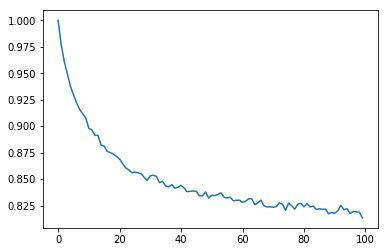

In [7]:
from proj1_helpers import batch_iter
# Define the parameters of the algorithm.
max_iters = 100
gamma = 0.02
batch_size = 50000

# Initialization
w_initial = np.zeros(30)
print(w_initial)

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = least_squares_SGD(
    y, tX_std, w_initial,batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

plt.plot(sgd_losses)

# least square
computed by solving for w:  X<sup>T</sup>X * w = X<sup>T</sup>y

In [8]:
def least_square(y, tx):
    w = np.linalg.solve(tx.T@tx,tx.T@y)
    return w, compute_loss(y, tx, w)


In [9]:
wls, loss = least_square(y, tX_std)

# Ridge regression

In [10]:
def ridge_regression(y, tx, lamda):
    w = np.linalg.solve(tx.T@tx+lamda*np.eye(tx.shape[1]),tx.T@y)
    return w, compute_loss(y, tx, w)


In [11]:
wls, loss = ridge_regression(y, tX_std,0)
print(loss)

0.7779046298744507


# Logistic regression

In [36]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def update_weights(tx, y, w, gamma):
    #probabilities array that the label is 1
    probabilities = sigmoid(np.dot(tx, w))
    gradient = np.dot(tx.T,  probabilities - y)
    w -= gradient*gamma / len(tx)
    return w

def loss_function_LR(tx, y, w):
    #probabilities array that the label is 1
    probabilities = sigmoid(np.dot(tx, w))
    #the error when label=1
    error1 = -y*np.log(probabilities)
    #the error when label=-1
    error2 = (1-y)*np.log(1-probabilities)
    #return average of sum of costs
    return (error1-error2).mean()


# logistic regression function
def logistic_regression(y,tx, initial_w,  max_iter, gamma):
    losses = []
    ws = []
    for iter_n in range(max_iter):
        w = update_weights(tx, y, initial_w, gamma)
        loss = loss_function_LR(tx, y, w)
        losses.append(loss)
        ws.append(w)
    return np.array(losses)[-1], np.array(ws)[-1]

#################################################################################
def decision_boundary(prob):
    return 1 if prob > 0.5 else -1

def classify(predictions):
    decision_boundary = np.vectorize(decision_boundary)
    return decision_boundary(predictions).flatten()

# regularized logistic regression

In [223]:
def reg_LR_update_weights(tx, y, w, gamma, lambda_):
    # probabilities array that the label is 1
    probabilities = sigmoid(np.dot(tx, w))
    gradient = np.dot(tx.T,  probabilities - y) + lambda_ * w
    w -= gradient*gamma / len(tx)
    return w

def reg_LR_loss_function(tx, y, w, lambda_):
    y2 = (y+1) / 2
    # probabilities array that the label is 1
    probabilities = sigmoid(np.dot(tx, w))
    # the error when label=1
    error1 = -y2*np.log(probabilities)
    # the error when label=-1
    error2 = (1-y2)*np.log(1-probabilities)
    # return average of sum of costs
    return (error1-error2).mean()+lambda_/2*np.dot(w.T,w)/ len(tx)


# regularized logistic regression function
def reg_logistic_regression(y,tx,lambda_, initial_w,  max_iter, gamma):
    losses = []
    ws = []
    for iter_n in range(max_iter):
        w = reg_LR_update_weights(tx, y, initial_w, gamma,lambda_)
        loss = reg_LR_loss_function(tx, y, w, lambda_)
        losses.append(loss)
        ws.append(w)
    return np.array(losses)[-1], np.array(ws)[-1]


# K fold functions

In [177]:
# compute K pairs of validations sets  of length 250 000 / K and train set of size 250 000- 250 000/K
def parallel_shuffle(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)
def split_cross_KFold(K, tx, y):
    temp_tx = np.copy(tx)
    temp_y = np.copy(y)
    parallel_shuffle(temp_tx,temp_y)
    train_set, val_set = [], []
    size = temp_tx.shape[0]//K
    for i in range(K):
        val_set.append((temp_tx[size*i:size+size*i], temp_y[size*i:size+size*i]))
        indices = range(size*i,size+size*i)
        train_set.append((np.delete(temp_tx, indices, axis = 0),np.delete(temp_y, indices, axis = 0)))
    return train_set, val_set



    

# functions updated for K-fold cross validation
we compute now the loss on the validations sets instead of the train ones

### regularized Logistic regression

In [244]:
#update logistic regression in order to compute loss on validation set
def reg_logistic_regression_val(tx_val,y_val,tx_train,y_train, initial_w,  max_iter, gamma,lambda_):
    losses_val = []
    losses_train = []
    ws = []
    for iter_n in range(max_iter):
        # update weights by gradient descent
        
        w = reg_LR_update_weights(tx_train, y_train, initial_w, gamma,lambda_)
        # compute loss on validation sets according to weights w
        loss_train = reg_LR_loss_function(tx_train, y_train, w,lambda_)
        loss_val = reg_LR_loss_function(tx_val, y_val, w,lambda_)
        losses_train.append(loss_train)
        losses_val.append(loss_val)

        ws.append(w)
            
    return np.array(losses_val), np.array(losses_train), np.array(ws)[-1]


def evaluate_Kfold_logistic(train_set,validation_set,iters, gamma,K,lambda_=0, plot=1):
    graph_train = []
    graph_val = []
    weigths_final = []
    validation_losses = []
    train_losses = []

    for i in range(K):
        max_iters = iters
        # Initialization
        w_initial = np.zeros(len(train_set[0][0][1]))
        # validation set [i][0] is matrice tx of the validation set i
        # validation set [i][1] is vector y of the validation set i
        validation_loss,train_loss, ws  = reg_logistic_regression_val(validation_set[i][0],validation_set[i][1], train_set[i][0], train_set[i][1], w_initial, max_iters, gamma, lambda_)
        validation_losses.append(validation_loss[-1])
        train_losses.append(train_loss[-1])

        weigths_final.append(ws)
        if plot:
            graph_val.append(validation_loss)
            graph_train.append(train_loss)
    if plot:
        plt.figure(1)
        plt.subplot(211)
        G = plt.plot(np.array(graph_val).T)
        leg = ["val "+str(i) for i in range(K)]
        plt.legend(G[:K], leg)
        plt.subplot(212)
        G2 = plt.plot(np.array(graph_train).T)
        leg2 = ["train "+str(i) for i in range(K)]
        plt.legend(G2[:K], leg2)
        
    return weigths_final, validation_losses, train_losses
    

### SGD 

In [207]:
def least_squares_SGD_val(tx_val,y_val,tx,y, initial_w, batch_size, max_iters, gamma):
    """Least square stochastic gradient descent algorithm."""
    # ***************************************************
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute random batch
        a = batch_iter(y, tx, batch_size, num_batches=1, shuffle=True)
        a = list(a)
        tx2, y2 = a[0][1], a[0][0]
        
        # compute gradient & loss
        grad = compute_stoch_gradient(y2,tx2,w)
        loss= compute_loss(y_val, tx_val, w)
        # update gradient
        w = w-gamma*grad
        # diminish gamma at each iteration
        gamma = gamma - gamma/10
        # store w and loss
        ws.append(w)
        losses.append(loss)
        #print("stoch Gradient Descent({bi}/{ti}): loss={l}".format(
              #bi=n_iter, ti=max_iters - 1, l=loss))

    return np.array(losses), np.array(ws)

def evalutate_Kfold_SGD(train_set,validation_set,iters, gamma,K,batch_size, plot=1):
    graph = []
    weigths_final = []
    validation_losses = []
    train_losses = []
    for i in range(K):
        max_iters = iters
        # Initialization
        w_initial = np.zeros(30)
        # validation set [i][0] is matrice tx of the validation set i
        # validation set [i][1] is vector y of the validation set i
        validation_losses, ws  = least_squares_SGD_val(validation_set[i][0],validation_set[i][1], train_set[i][0], train_set[i][1], w_initial,  batch_size, max_iters, gamma)
        #compute train_loss
        train_loss = loss_function(train_set[i][0], train_set[i][1], ws)
        validation_losses.append(validation_loss[-1])
        train_losses.append(train_loss)

        weigths_final.append(ws)
        
        if plot:
            graph.append(losses)
    if plot:
        G = plt.plot(np.array(graph).T)
        leg = [""+str(i) for i in range(K)]
        plt.legend(G[:K], leg)
        
    return weigths_final, validation_losses, train_losses

# main 

In [178]:
DATA_TRAIN_PATH = '../data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

# standardize the data
tX_std = standardize(tX)

In [241]:
#put feature exp here

def fesquare(tx):
    temp = np.copy(tx)
    return np.concatenate((temp,temp**2),axis=1)

In [246]:
# the train function serves to generalize training for each method.
def train(Model,gamma,max_iter = 100, batch_size=1, K=5,lambda_=0):
    assert( K > 1)
    #feature expansion
    tX_std_expanded = fesquare(tX_std)
    # perform K pairs for the cross validation
    train_set, val_set = split_cross_KFold(K, tX_std_expanded, y)
    if Model == 'Log_reg':
        wf, validation_lost, train_loss = evaluate_Kfold_logistic(train_set, val_set, max_iter,gamma,K,lambda_ )
        
    if Model == 'SGD':
        wf, validation_lost, train_loss = evalutate_Kfold_SGD(train_set, val_set, max_iter ,gamma,K,batch_size,lambda_ )
        
        
    print(f'Function: {Model} used, K = {K}, Best final loss :{np.min(validation_lost)}')
    for i in range(len(validation_lost)):
        print(f'validation_lost {i}: {str(validation_lost[i])[:6]} , train_loss {i}: {str(train_loss[i])[:6]}')
    print(f'mean validation lost: {np.mean(validation_lost)}')
    
    

In [ ]:
train('Log_reg',0.0005,lambda_=0.008)

## Generate predictions and save ouput in csv format for submission:

In [ ]:
# load test data
DATA_TEST_PATH = '../data/test.csv' 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

# standardize wrt the tx train mean and std
def standardize_test(tx, tx_test):
    centered_data = tx_test - np.mean(tx, axis=0)
    std_data = centered_data / np.std(tx, axis=0)
    return std_data
tX_test_std = standardize_test(tX, tX_test)
OUTPUT_PATH = 'outLogRegD23v2.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(wf[9], tX_test_std)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)
